In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv("salary_datas.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [14]:
mean_salary = 76003.0
mean_exp    =  5.313333
rate_per_year = mean_salary / mean_exp
df['ExpectedSalary'] = df['YearsExperience'] * rate_per_year

# 3. Flag under‑ or over‑paid:
df['type'] = np.where(df['Salary'] < df['ExpectedSalary'],
                      0,
                      1)

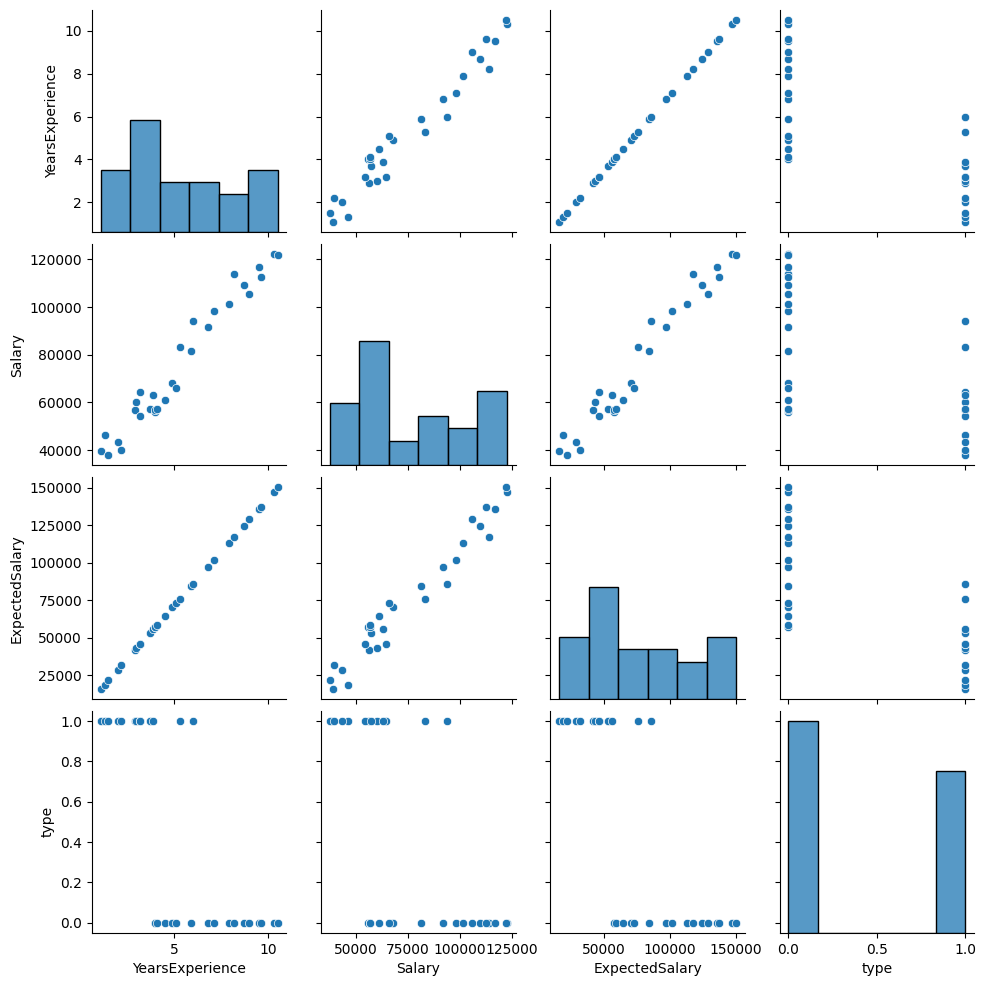

In [15]:
import seaborn as sns
sns.pairplot(df)

In [19]:
df.head()

,YearsExperience,Salary,ExpectedSalary,type
0,1.1,39343.0,15734.624576,1
1,1.3,46205.0,18595.465407,1
2,1.5,37731.0,21456.306239,1
3,2.0,43525.0,28608.408319,1
4,2.2,39891.0,31469.249151,1


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [39]:
X = df.iloc[:, :-1].values  # independent
y = df.iloc[:, -1].values  # dependent

In [25]:
X = df.drop(['ExpectedSalary', "type"], axis = 1)
y = df['type']

In [48]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2, random_state = 20)

In [49]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [50]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
slope = reg.coef_
print(slope)


[-0.64919175  0.95289545 -0.64919175]


In [52]:
intercept = reg.intercept_
print(intercept)


0.41666666666666663


In [53]:
y_pred = reg.predict(xtrain)

ValueError: x and y must be the same size

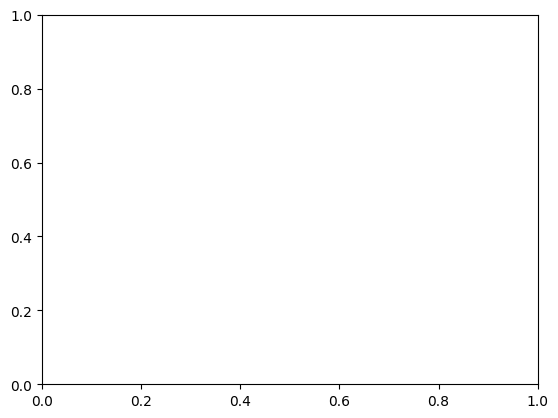

In [54]:
import matplotlib.pyplot as plt

plt.scatter(xtrain, ytrain, label="Train data")
plt.plot(xtrain, y_pred_train, color="red", label="Model fit")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()